Açussena Macedo Mautone - Rm:552568

Deliz Voidela Toledo - Rm:98595

Carlos Eduardo Caramante Ribeiro Rm: 552159

Perguntas

1. Qual é a distribuição de idade dos participantes?
2. Existe uma correlação entre idade e peso inicial?
3. Como o nível de atividade física influencia a mudança de peso?
4. Qual é o impacto do déficit/caloria excedente diário na mudança de peso?
5. Existe uma relação entre a qualidade do sono e o estresse dos participantes?
6. Como a idade e o nível de atividade física influenciam o déficit/caloria excedente diário?
7. Qual é a relação entre a taxa de mudança de peso e a duração do programa em semanas?
8. Qual é a diferença média de peso entre homens e mulheres no final do estudo?
9. O estresse afeta a mudança de peso?
10. Qual algoritmo de ML é mais eficaz para prever a mudança de peso dos participantes?

Importando as bibliotecas necessárias:

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Carregando conjunto de dados

In [30]:
df = pd.read_csv('weight_change_dataset.csv')

Exibindo as primeiras linhas do dataframe

In [31]:
df.head()

,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
0,1,56,M,228.4,3102.3,3916.0,813.7,0.2,1,Sedentary,Excellent,6,228.6
1,2,46,F,165.4,2275.5,3823.0,1547.5,2.4,6,Very Active,Excellent,6,167.8
2,3,32,F,142.8,2119.4,2785.4,666.0,1.4,7,Sedentary,Good,3,144.2
3,4,25,F,145.5,2181.3,2587.3,406.0,0.8,8,Sedentary,Fair,2,146.3
4,5,38,M,155.5,2463.8,3312.8,849.0,2.0,10,Lightly Active,Good,1,157.5


Limpeza de dados

In [32]:
df.isnull().sum()

Participant ID                   0
Age                              0
Gender                           0
Current Weight (lbs)             0
BMR (Calories)                   0
Daily Calories Consumed          0
Daily Caloric Surplus/Deficit    0
Weight Change (lbs)              0
Duration (weeks)                 0
Physical Activity Level          0
Sleep Quality                    0
Stress Level                     0
Final Weight (lbs)               0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Participant ID                 100 non-null    int64  
 1   Age                            100 non-null    int64  
 2   Gender                         100 non-null    object 
 3   Current Weight (lbs)           100 non-null    float64
 4   BMR (Calories)                 100 non-null    float64
 5   Daily Calories Consumed        100 non-null    float64
 6   Daily Caloric Surplus/Deficit  100 non-null    float64
 7   Weight Change (lbs)            100 non-null    float64
 8   Duration (weeks)               100 non-null    int64  
 9   Physical Activity Level        100 non-null    object 
 10  Sleep Quality                  100 non-null    object 
 11  Stress Level                   100 non-null    int64  
 12  Final Weight (lbs)             100 non-null    floa

In [34]:
df.describe()

,Participant ID,Age,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Stress Level,Final Weight (lbs)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,37.910000,171.533000,2518.206000,3518.292000,1000.091000,-2.779817,6.920000,4.810000,168.750000
std,29.011492,12.219454,30.333856,364.431221,513.313097,371.560827,7.443719,3.515277,2.576879,30.588004
min,1.000000,18.000000,100.000000,1566.500000,2030.900000,82.500000,-35.678115,1.000000,1.000000,98.200000
25%,25.750000,26.750000,153.650000,2255.050000,3233.300000,766.950000,-5.012312,4.000000,2.750000,149.550000
50%,50.500000,38.000000,172.150000,2519.500000,3636.050000,1013.100000,0.100000,7.000000,5.000000,169.800000
75%,75.250000,46.250000,192.475000,2805.975000,4000.000000,1253.325000,1.850000,10.000000,7.000000,188.300000
max,100.000000,59.000000,238.200000,3390.800000,4000.000000,1922.500000,5.000000,12.000000,9.000000,232.500000


1. Qual é a distribuição de idade dos participantes?

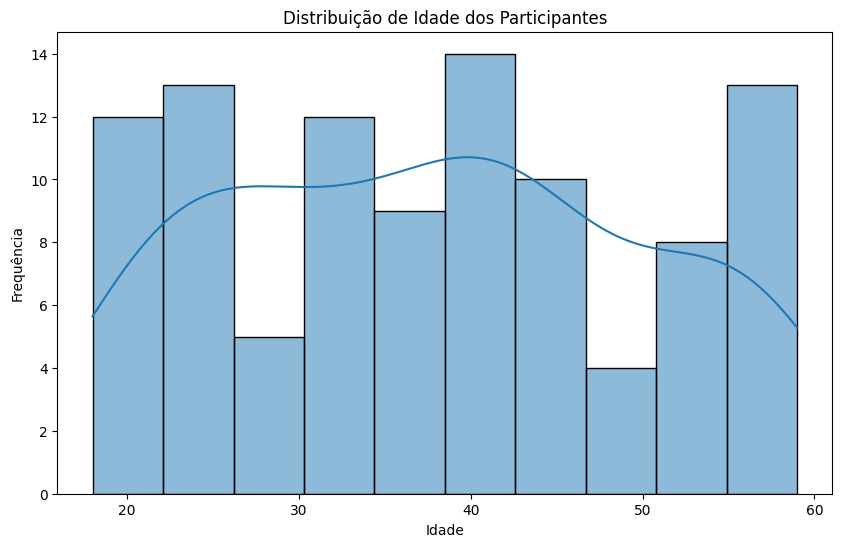

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Distribuição de Idade dos Participantes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

Nessa questão utilizamos as bibliotecas Matplotlib e Seaborn para criar um histograma. Esse código gera um gráfico que mostra a distribuição das idades dos participantes, permitindo visualizar quantos participantes estão em diferentes faixas etárias, junto com uma curva que representa a densidade dos dados.

2. Existe uma correlação entre idade e peso inicial?

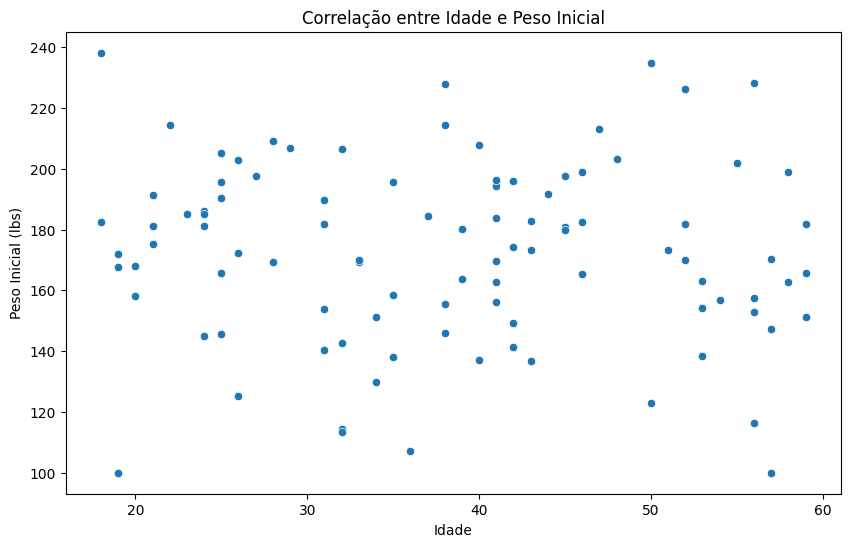

In [66]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Current Weight (lbs)', data=df)
plt.title('Correlação entre Idade e Peso Inicial')
plt.xlabel('Idade')
plt.ylabel('Peso Inicial (lbs)')
plt.show()

Nessa questão utilizamos as bibliotecas Matplotlib e Seaborn para criar um gráfico de dispersão (scatter plot). Esse código gera um gráfico de dispersão que permite visualizar a relação entre a idade dos participantes e seu peso inicial, ajudando a identificar padrões ou correlações entre essas duas variáveis. Cada ponto no gráfico representa um participante, com sua idade no eixo x e seu peso no eixo y.

3. Como o nível de atividade física influencia a mudança de peso?

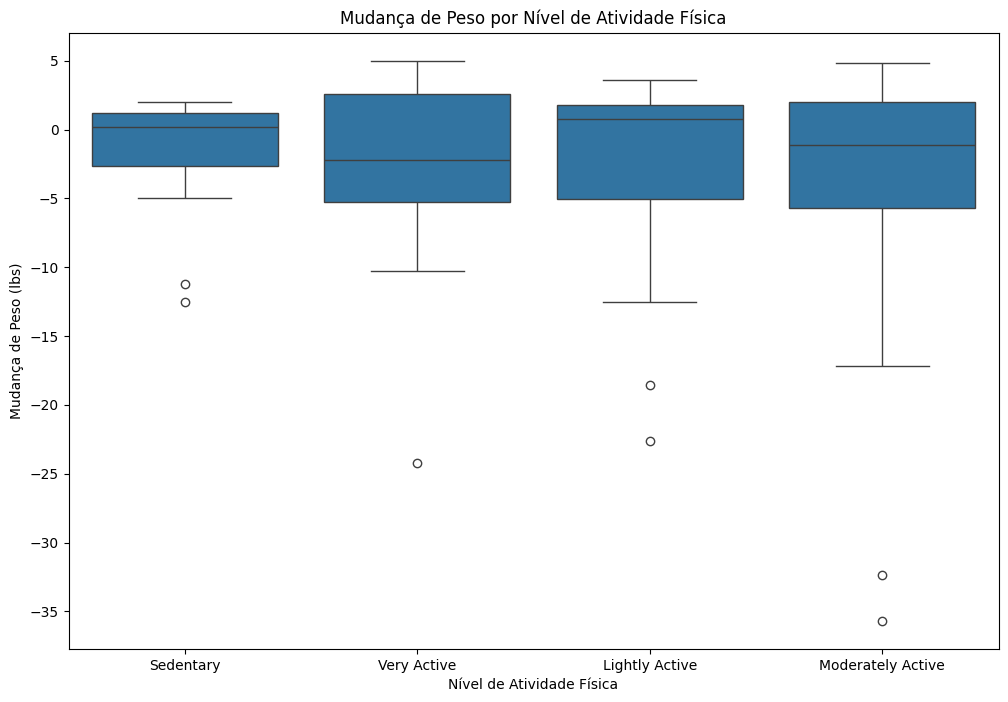

In [37]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Physical Activity Level', y='Weight Change (lbs)', data=df)
plt.title('Mudança de Peso por Nível de Atividade Física')
plt.xlabel('Nível de Atividade Física')
plt.ylabel('Mudança de Peso (lbs)')
plt.show()

Nessa questão utilizamos as bibliotecas Matplotlib e Seaborn para criar um gráfico de boxplot. Esse código gera um boxplot que permite visualizar a distribuição da mudança de peso em relação aos diferentes níveis de atividade física. Cada caixa no boxplot representa a mediana e a variação dos dados de mudança de peso para cada nível de atividade, além de indicar valores atípicos (outliers) que podem existir. Isso ajuda a entender como a atividade física pode impactar a mudança de peso nos participantes.

4. Qual é o impacto do déficit/caloria excedente diário na mudança de peso?

Correlação entre déficit/caloria excedente diário e mudança de peso: 0.024844563634859762


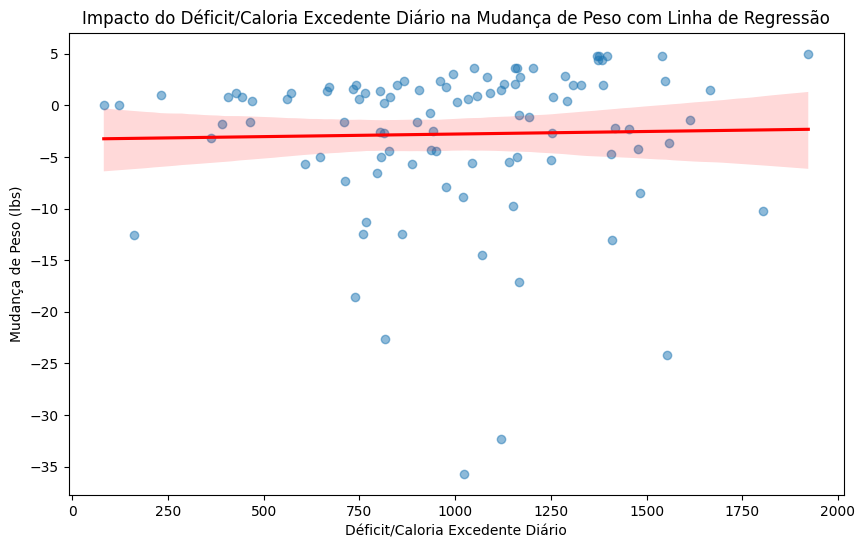

In [60]:
caloric_deficit_weight_change_corr, _ = pearsonr(df['Daily Caloric Surplus/Deficit'], df['Weight Change (lbs)'])
print(f'Correlação entre déficit/caloria excedente diário e mudança de peso: {caloric_deficit_weight_change_corr}')

plt.figure(figsize=(10, 6))
sns.regplot(x='Daily Caloric Surplus/Deficit', y='Weight Change (lbs)', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Impacto do Déficit/Caloria Excedente Diário na Mudança de Peso com Linha de Regressão')
plt.xlabel('Déficit/Caloria Excedente Diário')
plt.ylabel('Mudança de Peso (lbs)')
plt.show()

Nessa questão utilizamos a biblioteca SciPy.Esse código calcula a correlação entre o déficit/caloria excedente diário e a mudança de peso, e gera um gráfico de dispersão que mostra essa relação, incluindo uma linha de regressão para ajudar a visualizar a tendência.

5. Existe uma relação entre a qualidade do sono e o estresse dos participantes?

  Sleep Quality  Stress Level
0     Excellent      4.500000
1          Fair      4.833333
2          Good      4.181818
3          Poor      5.289474


C:\Users\Açussena\AppData\Local\Temp\ipykernel_11700\4116141390.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sleep Quality', y='Stress Level', data=sleep_stress_mean, palette='viridis')


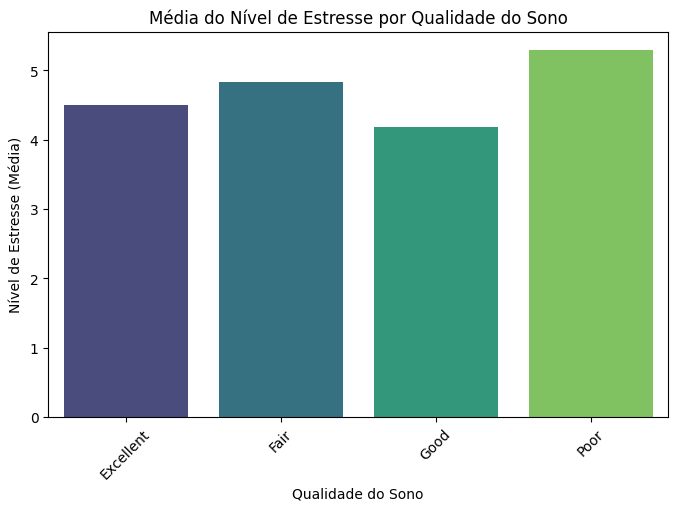

In [48]:
sleep_stress_mean = df.groupby('Sleep Quality')['Stress Level'].mean().reset_index()
print(sleep_stress_mean)

plt.figure(figsize=(8, 5))
sns.barplot(x='Sleep Quality', y='Stress Level', data=sleep_stress_mean, palette='viridis')
plt.title('Média do Nível de Estresse por Qualidade do Sono')
plt.xlabel('Qualidade do Sono')
plt.ylabel('Nível de Estresse (Média)')
plt.xticks(rotation=45)
plt.show()

Nessa questão utilizamos as bibliotecas Pandas, Matplotlib e Seaborn. Esse código calcula a média do nível de estresse para diferentes qualidades de sono e gera um gráfico de barras que visualiza essa relação. O gráfico permite entender como a qualidade do sono pode impactar os níveis de estresse, oferecendo uma representação clara das médias calculadas.

6. Como a idade e o nível de atividade física influenciam o déficit/caloria excedente diário?

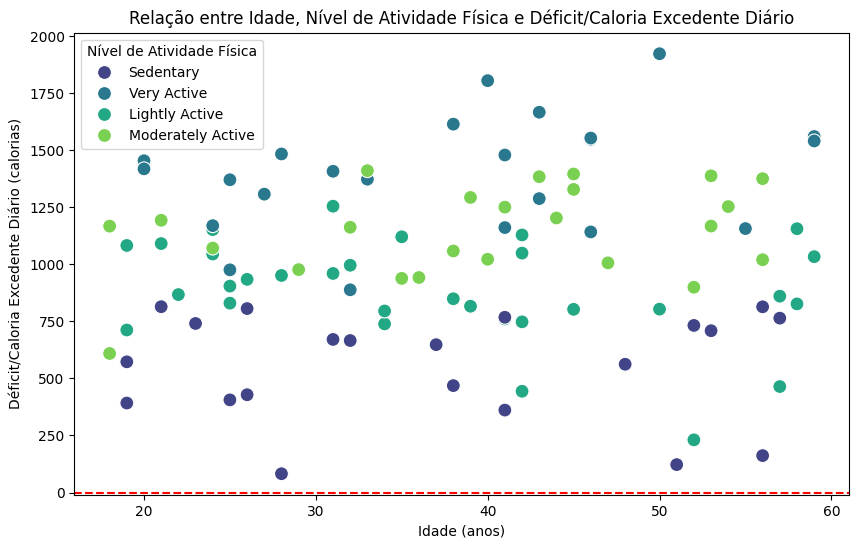

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Daily Caloric Surplus/Deficit', hue='Physical Activity Level', data=df, palette='viridis', s=100)
plt.title('Relação entre Idade, Nível de Atividade Física e Déficit/Caloria Excedente Diário')
plt.xlabel('Idade (anos)')
plt.ylabel('Déficit/Caloria Excedente Diário (calorias)')
plt.axhline(0, color='red', linestyle='--') 
plt.legend(title='Nível de Atividade Física')
plt.show()

Nessa questão utilizamos as bibliotecas Matplotlib e Seaborn. Esse código gera um gráfico de dispersão que ilustra a relação entre a idade dos participantes, seu nível de atividade física e o déficit/excedente calórico diário. Cada ponto representa um participante, e a cor do ponto indica seu nível de atividade física.

7. Qual é a relação entre a taxa de mudança de peso e a duração do programa em semanas?

    Duration (weeks)  Weight Change (lbs)
0                  1            -0.816139
1                  2            -0.354685
2                  3            -1.493202
3                  4            -1.676909
4                  5            -1.424107
5                  6            -4.222938
6                  7             0.004733
7                  8            -4.877865
8                  9            -4.269735
9                 10            -4.019608
10                11           -12.767046
11                12            -1.202632


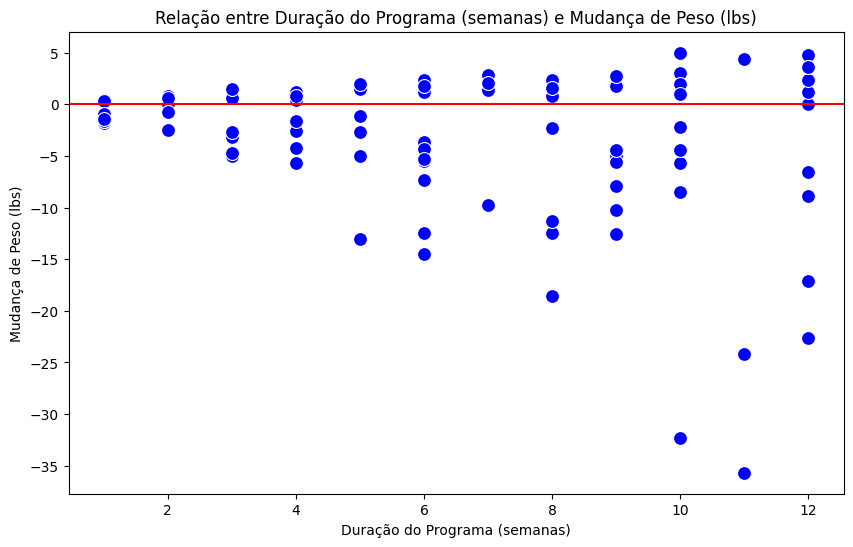

In [53]:
weight_change_duration_mean = df.groupby('Duration (weeks)')['Weight Change (lbs)'].mean().reset_index()
print(weight_change_duration_mean)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (weeks)', y='Weight Change (lbs)', data=df, color='blue', s=100)
plt.title('Relação entre Duração do Programa (semanas) e Mudança de Peso (lbs)')
plt.xlabel('Duração do Programa (semanas)')
plt.ylabel('Mudança de Peso (lbs)')
plt.axhline(0, color='red')
plt.show()

Nessa questão utilizamos as bibliotecas Pandas, Matplotlib e Seaborn. Esse código calcula a média da mudança de peso em relação à duração do programa e gera um gráfico de dispersão que visualiza essa relação. Cada ponto no gráfico representa um participante, mostrando como a duração do programa impacta a mudança de peso. 

8. Qual é a diferença média de peso entre homens e mulheres no final do estudo?

In [44]:
final_weight_men = df[df['Gender'] == 'M']['Final Weight (lbs)']
final_weight_women = df[df['Gender'] == 'F']['Final Weight (lbs)']
mean_weight_men = final_weight_men.mean()
mean_weight_women = final_weight_women.mean()
weight_diff = mean_weight_men - mean_weight_women
print(f'Diferença média de peso no final do estudo entre homens e mulheres: {weight_diff}')

Diferença média de peso no final do estudo entre homens e mulheres: 15.840473276213743


Nessa questão utilizamos a biblioteca Pandas. Esse código calcula e exibe a diferença média de peso final entre homens e mulheres em um estudo. Ele fornece uma análise quantitativa sobre como o peso final difere entre os gêneros, permitindo inferências sobre possíveis variações nas respostas ao tratamento ou programa estudado.

9. O estresse afeta a mudança de peso?

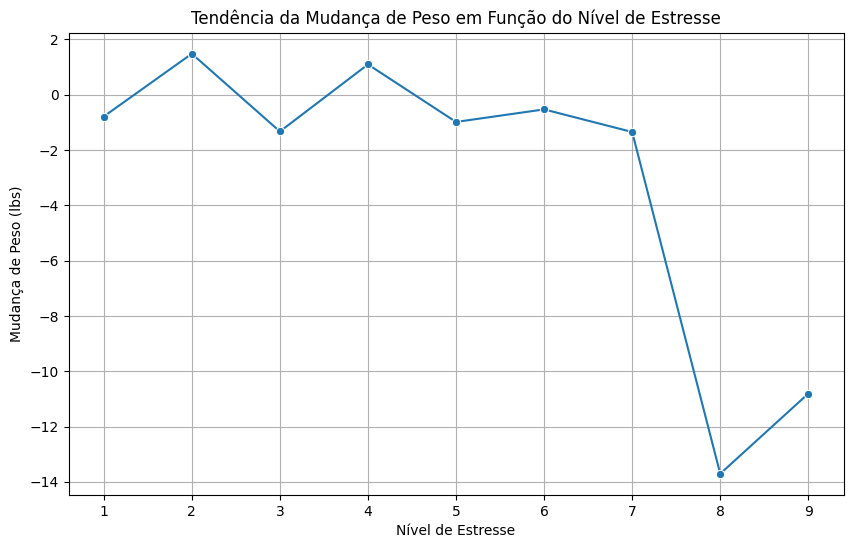

In [46]:
df_grouped = df.groupby('Stress Level')['Weight Change (lbs)'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Stress Level', y='Weight Change (lbs)', data=df_grouped, marker='o')
plt.title('Tendência da Mudança de Peso em Função do Nível de Estresse')
plt.xlabel('Nível de Estresse')
plt.ylabel('Mudança de Peso (lbs)')
plt.grid()
plt.show()

Nessa questão utilizamos as bibliotecas Pandas, Matplotlib e Seaborn. Esse código gera um gráfico de linhas que ilustra a tendência da mudança de peso em função do nível de estresse. O gráfico permite visualizar como a média da mudança de peso varia com diferentes níveis de estresse, ajudando a entender a relação entre essas duas variáveis.

10. Qual algoritmo de ML é mais eficaz para prever a mudança de peso dos participantes?

In [59]:
df_encoded = pd.get_dummies(df.drop(columns=['Participant ID']), drop_first=True)

X = df_encoded.drop(columns=['Weight Change (lbs)'])
y_regression = df_encoded['Weight Change (lbs)']
y_classification = df_encoded['Weight Change (lbs)'].apply(lambda x: 1 if x > 0 else 0)

X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.3, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_classification, test_size=0.3, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train_reg)
y_pred_reg = regressor.predict(X_test)

mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f'Mean Squared Error (Regressão Linear): {mse}')

classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_cls, y_train_cls)
y_pred_cls = classifier.predict(X_test_cls)

accuracy = accuracy_score(y_test_cls, y_pred_cls)
print(f'Accuracy (Random Forest Classifier): {accuracy}')


Mean Squared Error (Regressão Linear): 0.0005150142883822964
Accuracy (Random Forest Classifier): 0.9333333333333333


O código acima realiza a preparação dos dados e aplica dois modelos de aprendizado de máquina: um modelo de regressão linear para prever a mudança de peso e um classificador de floresta aleatória (Random Forest) para classificar se houve ganho ou perda de peso.

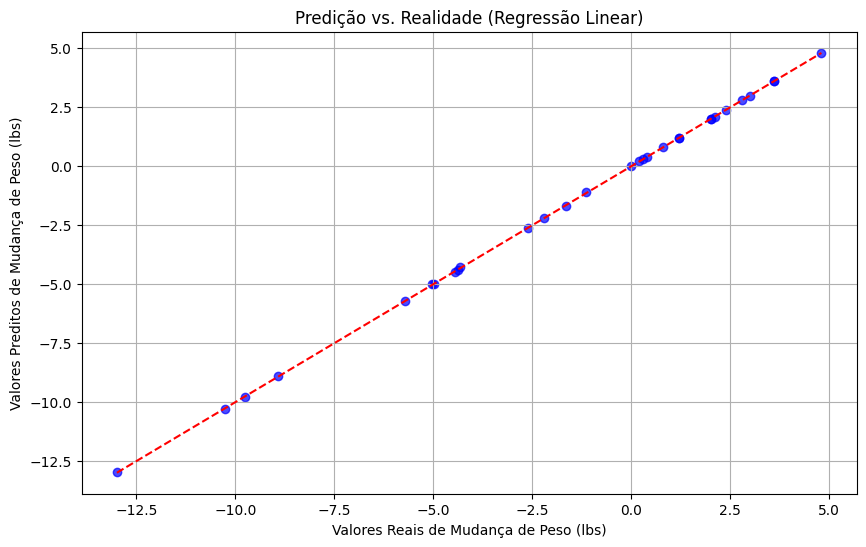

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.7, color='blue')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], color='red', linestyle='--')  # linha ideal
plt.title('Predição vs. Realidade (Regressão Linear)')
plt.xlabel('Valores Reais de Mudança de Peso (lbs)')
plt.ylabel('Valores Preditos de Mudança de Peso (lbs)')
plt.grid()
plt.show()

Esse código gera um gráfico de dispersão que compara os valores reais da mudança de peso com os valores preditos pelo modelo de regressão linear. A linha diagonal representa a situação ideal em que as previsões estão perfeitamente alinhadas com os valores reais. Esse gráfico é uma ferramenta visual útil para avaliar a precisão do modelo de regressão e identificar onde ele pode ter cometido erros, como tendências sistemáticas (por exemplo, se os pontos tendem a estar acima ou abaixo da linha ideal).

<Figure size 800x600 with 0 Axes>

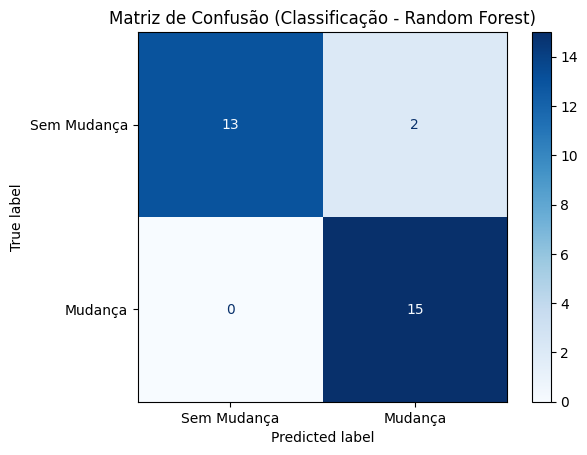

In [58]:
cm = confusion_matrix(y_test_cls, y_pred_cls)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sem Mudança', 'Mudança'])

plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão (Classificação - Random Forest)')
plt.show()

Esse código gera e exibe a matriz de confusão para o modelo de classificação de Floresta Aleatória. A matriz de confusão fornece uma visão clara sobre como o modelo se saiu em relação às classes reais, permitindo identificar os verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos. A visualização ajuda a avaliar o desempenho do classificador e a entender onde ele pode estar cometendo erros.